### Arbeidskrav 3

**Lever inn lenken til ditt repo på GitHub hvor løsningen ligger**. Individuell innlevering.

Se Jupyter notatblokk "Forsmak mappe 1" for et forslag til fremgangsmåte her, og kap 9 i boka. Samt forelesning 08.02.

Vi ser på markedet for oppdrettslaks på s. 101-104 i boka, og som vi har analysert i forelesning 5.      

Med en stykkavgift på $t$ kr per enhet pålagt selgere kan vi skrive etterspørsel og tilbud i (1) og (2):   


\begin{equation}
   x^{D}= 500 -3.2p\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3(p-t)\tag{2}
\end{equation}

1. Finn likevektspris og -kvantum for alle verdier av $t$.        
2. Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny.           
2. Tegn likevekten for $t=0$ og fargelegg KO og PO.     
2. Tegn inn likevekten for $t=4$, og fargelegg avgiftproveny.      
4. Bruk de uttrykkene som du har laget for å fylle ut følgende tabell. NB det er mening at du skal fylle ut tabellen med uttrykk som du har regnet i koden (ikke skriv inn tall manuelt - se Forsmak mappe 1.ipynb).

|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris   |     | |  |
|Produsentpris  | |   |  |
|Kvantum  |  |   |    |
| Konsumentoverskudd: |  | |     |
| Produsentoverskudd: | |  |   |
| KO + PO:    |    | |  |
|Skatteproveny| 0  | | |
| Dødvektstap  |0   |   ||

Basic Setup

In [287]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
from sympy.solvers import solve
from IPython.display import Markdown

from cycler import cycler
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker
import matplotlib.pylab as pylab


# custome plot style
params  = {
"lines.linewidth": 1.5,

"legend.fancybox": "true",

"axes.prop_cycle": cycler('color', ["#ffa822","#1ac0c6","#ff6150","#30B66A","#B06AFF","#FF21E1"]),
"axes.facecolor": "#2b2b2b",
"axes.axisbelow": "true",
"axes.grid": "true",
"axes.edgecolor": "#2b2b2b",
"axes.linewidth": 0.5,
"axes.labelpad": 0,

"patch.edgecolor": "#2b2b2b",
"patch.linewidth": 0.5,

"grid.linestyle": "--",
"grid.linewidth": 0.5,
"grid.color": "#b8aba7",

"xtick.major.size": 0,
"xtick.minor.size": 0,
"ytick.major.size": 0,
"ytick.minor.size": 0,

"font.family":"monospace",
"font.size":10.0,
"text.color": "#FFE9E3",
"axes.labelcolor": "#b8aba7",
"xtick.color": "#b8aba7",
"ytick.color": "#b8aba7",

"savefig.edgecolor": "#2b2b2b",
"savefig.facecolor": "#2b2b2b",

"figure.subplot.left": 0.08,
"figure.subplot.right": 0.95,
"figure.subplot.bottom": 0.09,
"figure.facecolor": "#2b2b2b"}

pylab.rcParams.update(params)
print("finish")

finish


Createing demand and supply function

In [288]:
#def demand(p:float=0.0,t:float=0.0):
#    return 500-3.2*p
#def supply(p:float=0.0,t:float=0.0):
#    return -100+4.3*(p-t)

#inverse
def demand(p:float=0.0,t:float=0.0):
    return (500-p)/3.2

def supply(p:float=0.0,t:float=0.0):
    return ((100+p)/4.3) + t

Basic Functions

In [289]:
# equilibrium price and quantity function
def equilib(_supply,_demand,extra_change_demand:float = 0,extra_change_supply:float = 0):
    x,p,t,T=sp.symbols('x p t T', positive=True, real=True)
    eq_cond=sp.Eq(_demand(p,t),_supply(p,t))
    
    y_eq=sp.solve(eq_cond,p)
    y_eq_fn=sp.lambdify((t,T), y_eq[0])
    
    x_eq=_supply(y_eq[0],t)
    x_eq_fn=sp.lambdify((t,T), x_eq)
    
    y = y_eq_fn(extra_change_supply,extra_change_demand)
    x = x_eq_fn(extra_change_supply,extra_change_demand)
    return x,y

# surpluss functions
def consumer_surplus_fun(Ey,Ex):
    x=sp.symbols('x', real=True, positive=True)
    return sp.integrate(demand(x)-Ey,(x,0,Ex))

def producer_surplus_fun(Ey,Ex):
    x=sp.symbols('x', real=True, positive=True)
    return sp.integrate(Ey-supply(x),(x,0,Ex))


# draw lines to x and y ax
def graph_xy_line(ax,x,y):
    return ax.plot([0,x], [y, y], linestyle='dashed', color='white'),ax.plot([x,x], [y, 0], linestyle='dashed', color='white')



# create graph function
def create_ax(x_label:str='x_label',y_label:str='y_label',lim:list=[(0,None),(0,None)],x_pos:str = 'right',y_pos:str='top'):
                fig, ax = plt.subplots(figsize=(10,5))
                ax.set_ylabel(y_label, loc=y_pos)
                ax.set_xlabel(x_label, loc=x_pos)
                ax.set(xlim=lim[0])
                ax.set(ylim=lim[1])
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

Draw Graph

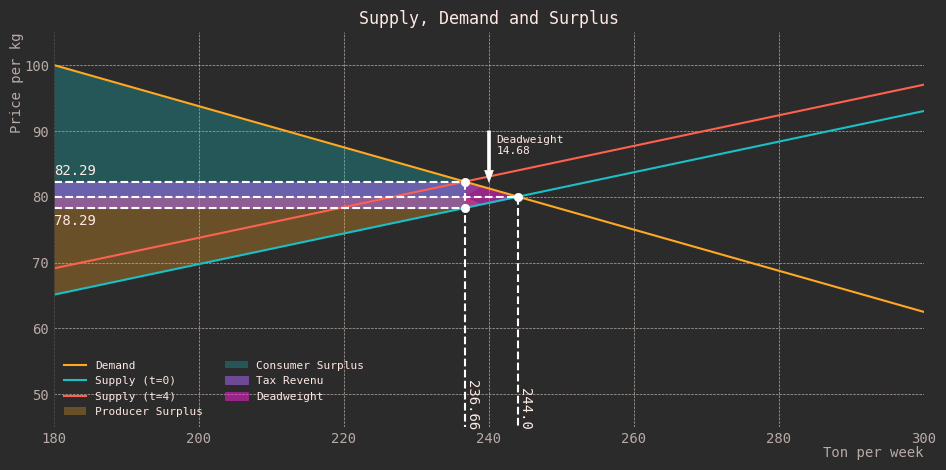

In [295]:
graph_Xmin = 180
graph_Xmax = 300
graph_Ymin = 45
graph_Ymax = 105

Ey,Ex = equilib(supply,demand)
Ey2,Ex2 = equilib(supply,demand, extra_change_supply=4)
Ey3 = Ey2-4

x_num=np.linspace(0,300,100)
q_num=np.linspace(0,Ex,100)
p_num=np.linspace(0,Ey,100)
test_num = np.linspace(Ex2,Ex,10)

fig, ax = create_ax(x_label='Ton per week',
                    y_label='Price per kg',
                    lim=[(graph_Xmin,graph_Xmax),(graph_Ymin,graph_Ymax)]
)


ax.plot(x_num,demand(x_num, 0), label='Demand')
ax.plot(x_num,supply(x_num, 0), label='Supply (t=0)')
ax.plot(x_num,supply(x_num, 4), label='Supply (t=4)')
ax.plot([0,Ex2], [Ey2-4, Ey2-4], linestyle='dashed', color='white')

ax.scatter(Ex,Ey,zorder=2, color='white')
ax.scatter(Ex2,Ey2,zorder=2, color='white')
ax.scatter(Ex2,Ey3,zorder=2, color='white')

graph_xy_line(ax,Ex,Ey)
graph_xy_line(ax,Ex2,Ey2)

ax.fill_between(q_num,supply(q_num),Ey,where=q_num<=Ex2,alpha = 0.3,label="Producer Surplus",interpolate=True)#Produsentoverskudd
ax.fill_between(q_num,demand(q_num),Ey,where=q_num<=Ex2,alpha = 0.3,label="Consumer Surplus",interpolate=True)#Konsumentoverskudd

ax.fill_between(q_num,Ey2,Ey3,where=q_num<=Ex2,color="#B06AFF",alpha = 0.5,label="Tax Revenu")#Tax

ax.fill_between(test_num,supply(test_num),demand(test_num),color="#FF21E1",alpha = 0.5,label="Deadweight")#Deadweight

#awnser_text = """ """
#ax.text(0,15, awnser_text, fontsize=8)

ax.text(Ex,graph_Ymin, f"{round(Ex,2)}", fontsize=10,rotation=-90)
ax.text(Ex2,graph_Ymin, f"{round(Ex2,2)}", fontsize=10,rotation=-90)

ax.text(graph_Xmin,Ey3-2.5, f"{round(Ey3,2)}", fontsize=10)
ax.text(graph_Xmin,Ey2+1, f"{round(Ey2,2)}", fontsize=10)

ax.arrow(Ex-4, Ey+10, 0, -6, width = 0.4,zorder=2, color='white')
ax.text(Ex-3,Ey+6.5, f"Deadweight\n{round((Ey2-Ey3)*(Ex-Ex2)/2,2)}", fontsize=8)

ax.set_title('Supply, Demand and Surplus')
ax.legend(loc='lower left',frameon=False,ncol=2,prop={'size': 8});

Table

In [291]:
producer_surplus=producer_surplus_fun(Ey,Ex)
consumer_surplus=consumer_surplus_fun(Ey,Ex)

producer_surplus_tax=producer_surplus_fun(Ey2,Ex2)
consumer_surplus_tax=consumer_surplus_fun(Ey2,Ex2)

welfare_surplus = consumer_surplus+producer_surplus
welfare_surplus_tax = consumer_surplus_tax+producer_surplus_tax

taxr=(Ey2-Ey3)*Ex2
deadweight = (Ey2-Ey3)*(Ex-Ex2)/2


tbl =f"""
|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris   |{round(Ey,3)}     |{round(Ey2,3)} |{round(Ey2-Ey,3)}  |
|Produsentpris  |{round(Ey,3)} |{round(Ey3,3)}   |{round(Ey3-Ey,3)}  |
|Kvantum  |{round(Ex,3)}  |{round(Ex2,3)}   |{round(Ex2-Ex,3)}    |
| Konsumentoverskudd: |{round(consumer_surplus,3)}  |{round(consumer_surplus_tax,3)} |{round(consumer_surplus_tax-consumer_surplus,3)}     |
| Produsentoverskudd: |{round(producer_surplus,3)} |{round(producer_surplus_tax,3)}  |{round(producer_surplus_tax-producer_surplus,3)}   |
| KO + PO:    |{round(welfare_surplus,3)}    |{round(welfare_surplus_tax,3)} |{round(welfare_surplus_tax-welfare_surplus,3)}  |
|Skatteproveny|{0}  |{round(taxr,3)} |{round(taxr,3)} |
| Dødvektstap  |{0}   |{round(deadweight,3)}   |{round(deadweight,3)}|
"""
display(Markdown(tbl))


|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris   |80.0     |82.293 |2.293  |
|Produsentpris  |80.0 |78.293   |-1.707  |
|Kvantum  |244.0  |236.661   |-7.339    |
| Konsumentoverskudd: |9302.500  |8751.342 |-551.158     |
| Produsentoverskudd: |6922.791 |7459.272  |536.481   |
| KO + PO:    |16225.291    |16210.613 |-14.677  |
|Skatteproveny|0  |946.645 |946.645 |
| Dødvektstap  |0   |14.677   |14.677|
